In [141]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split,cross_val_score,StratifiedKFold,learning_curve
#sns.set_style(style='white',context = 'notebook',palette='deep')

In [142]:
import pandas as pd
Weather = pd.read_csv("../input/did-it-rain-in-seattle-19482017/seattleWeather_1948-2017.csv")

In [143]:
Weather['RAIN'].value_counts()

False    14648
True     10900
Name: RAIN, dtype: int64

In [144]:
Weather['RAIN'] = Weather['RAIN'].apply(lambda x : 0 if x == False else 1 )
Weather['RAIN'].value_counts()

0    14648
1    10903
Name: RAIN, dtype: int64

In [145]:
Weather_plot = Weather[['PRCP']]

In [146]:
Weather.rename(columns = {'DATE':'date','PRCP':'precip','TMAX':'max_temp','TMIN':'min_temp','RAIN':'rain'},inplace = True)

In [147]:
Weather_plotting = Weather[['precip','max_temp','min_temp','rain']]

<Figure size 432x288 with 0 Axes>

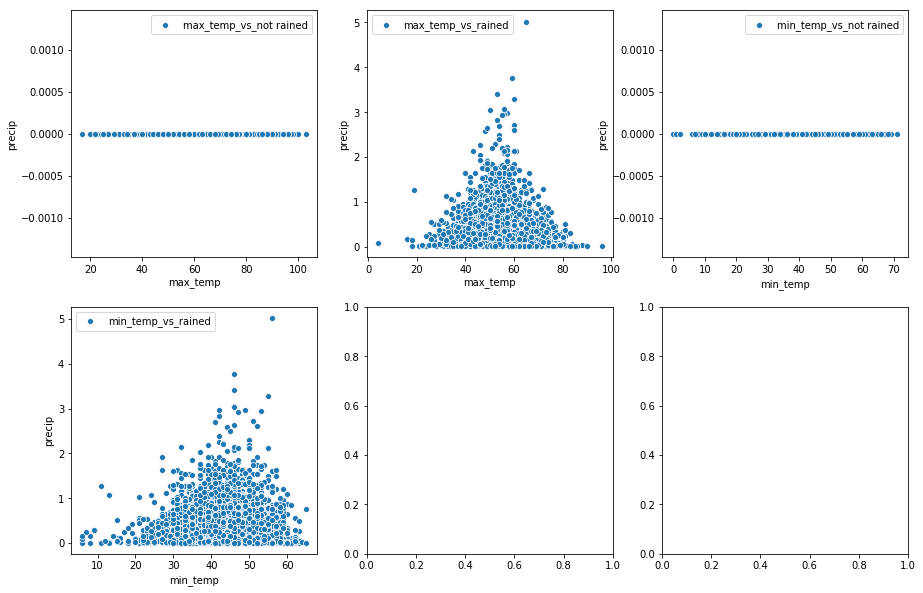

In [148]:
plt.figure()
w0 = Weather_plotting[Weather_plotting['rain'] == 0]
w1 = Weather_plotting[Weather_plotting['rain'] == 1]
fig,ax = plt.subplots(2,3,figsize = (15,10))
plt.subplot(2,3,1)
sns.scatterplot(w0['max_temp'],w0['precip'],label = 'max_temp_vs_not rained')
plt.subplot(2,3,2)
sns.scatterplot(w1['max_temp'],w1['precip'],label = 'max_temp_vs_rained')
plt.subplot(2,3,3)
sns.scatterplot(w0['min_temp'],w0['precip'],label = 'min_temp_vs_not rained')
plt.subplot(2,3,4)
sns.scatterplot(w1['min_temp'],w1['precip'],label = 'min_temp_vs_rained')
plt.show()

<Figure size 432x288 with 0 Axes>

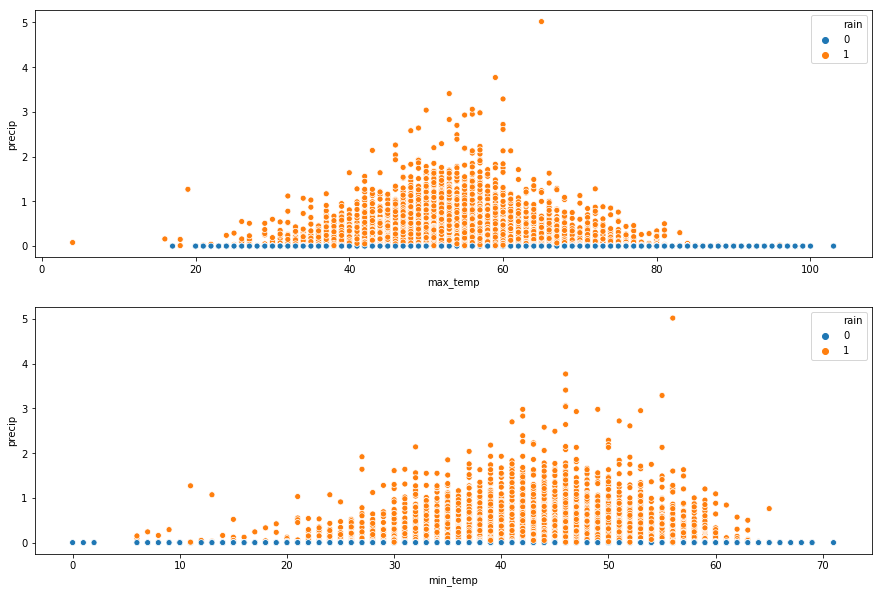

In [149]:
plt.figure()
fig,ax = plt.subplots(2,1,figsize = (15,10))
plt.subplot(2,1,1)
sns.scatterplot(x='max_temp',y='precip',hue='rain',data = Weather_plotting)
plt.subplot(2,1,2)
sns.scatterplot(x='min_temp',y='precip',hue='rain',data = Weather_plotting)

plt.show()

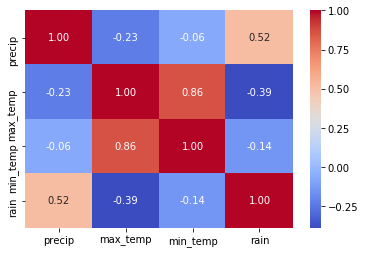

In [150]:
sns.heatmap(Weather_plotting.corr(),cmap='coolwarm',annot = True,fmt = '.2f')
plt.show()

In [151]:
total = Weather.isnull().sum()
percent = (Weather.isnull().sum()/Weather.isnull().count())
tt = pd.concat([total,percent],axis = 1,keys = ['Total','Percent'])
types = []
for col in Weather.columns:
    dtype = str(Weather[col].dtype)
    types.append(dtype)
tt['Types'] = types
np.transpose(tt)

,date,precip,max_temp,min_temp,rain
Total,0,3,0,0,0
Percent,0,0.000117412,0,0,0
Types,object,float64,int64,int64,int64


In [152]:
Weather.dropna(inplace = True)

In [153]:
X = Weather[['precip','max_temp','min_temp']].values
y = Weather['rain'].values.ravel()

In [154]:
clf = RandomForestClassifier(n_estimators = 100,criterion='entropy',random_state=0)
clf.fit(X,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [155]:
feature_importance = pd.Series(clf.feature_importances_,index = ['precip','max_temp','min_temp'])

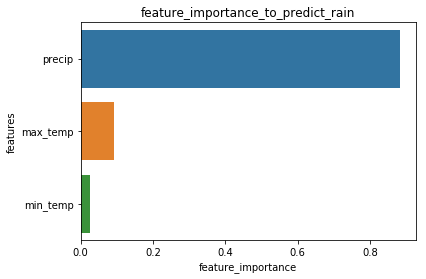

In [156]:
feature_importance_data_frame = pd.DataFrame(feature_importance).reset_index().rename(columns = {'index':'features',0:'feature_importance'})
sns.barplot(y= 'features',x='feature_importance',data=feature_importance_data_frame,orient='h')
plt.title('feature_importance_to_predict_rain')
plt.show()

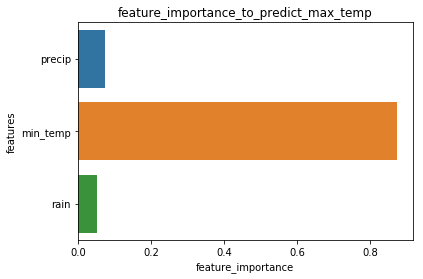

In [157]:
from sklearn.ensemble import RandomForestRegressor
X = Weather[['precip','min_temp','rain']].values
y = Weather['max_temp'].values.ravel()
clf = RandomForestRegressor(n_estimators = 100,random_state=0)
clf.fit(X,y)
feature_importance = pd.Series(clf.feature_importances_,index = ['precip','min_temp','rain'])
feature_importance_data_frame = pd.DataFrame(feature_importance).reset_index().rename(columns = {'index':'features',0:'feature_importance'})
sns.barplot(y= 'features',x='feature_importance',data=feature_importance_data_frame,orient='h')
plt.title('feature_importance_to_predict_max_temp')
plt.show()

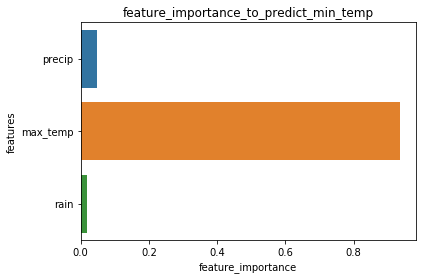

In [158]:
from sklearn.ensemble import RandomForestRegressor
X = Weather[['precip','max_temp','rain']].values
y = Weather['min_temp'].values.ravel()
clf = RandomForestRegressor(n_estimators = 100,random_state=0)
clf.fit(X,y)
feature_importance = pd.Series(clf.feature_importances_,index = ['precip','max_temp','rain'])
feature_importance_data_frame = pd.DataFrame(feature_importance).reset_index().rename(columns = {'index':'features',0:'feature_importance'})
sns.barplot(y= 'features',x='feature_importance',data=feature_importance_data_frame,orient='h')
plt.title('feature_importance_to_predict_min_temp')
plt.show()

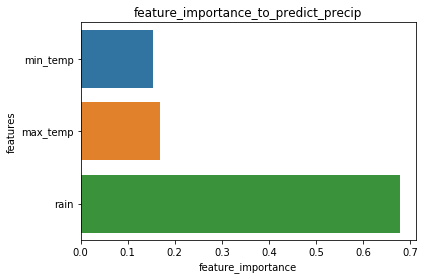

In [159]:
from sklearn.ensemble import RandomForestRegressor
X = Weather[['min_temp','max_temp','rain']].values
y = Weather['precip'].values.ravel()
clf = RandomForestRegressor(n_estimators = 100,random_state=0)
clf.fit(X,y)
feature_importance = pd.Series(clf.feature_importances_,index = ['min_temp','max_temp','rain'])
feature_importance_data_frame = pd.DataFrame(feature_importance).reset_index().rename(columns = {'index':'features',0:'feature_importance'})
sns.barplot(y= 'features',x='feature_importance',data=feature_importance_data_frame,orient='h')
plt.title('feature_importance_to_predict_precip')
plt.show()

In [160]:
# model to predict rain training a classifier


In [161]:
#random forest classifier
X = Weather[['precip','max_temp','min_temp']].values
y = Weather['rain'].values.reshape(-1,1)
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X = pt.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
clf = RandomForestClassifier(n_estimators = 100,criterion='entropy',random_state=0)
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
y_test_hat_probs = clf.predict_proba(X_test)[:,1]
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
print(classification_report(y_test,y_pred))
print('roc_auc_score',roc_auc_score(y_test,y_test_hat_probs))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  if __name__ == '__main__':


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3669
           1       1.00      1.00      1.00      2718

    accuracy                           1.00      6387
   macro avg       1.00      1.00      1.00      6387
weighted avg       1.00      1.00      1.00      6387

roc_auc_score 0.9999999999999999


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


-0.8175551877768128

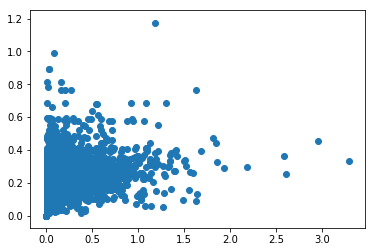

In [162]:
X = Weather[['rain','max_temp','min_temp']].values
y = Weather['precip'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
reg = RandomForestRegressor(n_estimators = 100,random_state=0)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
plt.scatter(y_test,y_pred)
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


0.7780692651889909

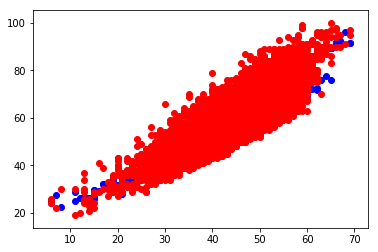

In [163]:
#random forest regressor
X = Weather[['rain','precip','min_temp']].values
y = Weather['max_temp'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
reg = RandomForestRegressor(n_estimators = 100,random_state=0)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
plt.scatter(X_test[:,2],y_pred,color='blue')
plt.scatter(X_test[:,2],y_test,color='red')
from sklearn.metrics import r2_score
r2_score(y_pred,y_test)

In [165]:
X_clf = Weather[['precip','max_temp','min_temp']].values
y_clf = Weather['rain'].values.reshape(-1,1)
X_reg = Weather[['rain','max_temp','min_temp']].values
y_reg = Weather['precip'].values.reshape(-1,1)

In [167]:
#parameters used in regression
reg.get_params()

{'bootstrap': True,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [168]:
#parameters used in classification
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

In [190]:
# lets do some hyper parameter tuning in this tree
from sklearn.model_selection import RandomizedSearchCV
#number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start=100,stop=2000,num=10)]
#number of reatures to be considered at every split
max_features = ['auto','sqrt']
#max number of levels in the tree
max_depth = [int(x) for x in np.linspace(10,110,num=11)]
max_depth.append(None)
#min number of samples required to split the node
min_sample_split = [2,5,10]
#min number of samples required at each leaf node
min_sample_leaf = [1,2,4]
#method for selecting sample for training each tree
bootstrap = [True,False]

In [191]:
#creating random grid
random_grid_clf = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_sample_split,
               'min_samples_leaf':min_sample_leaf,
               'bootstrap':bootstrap,
               'criterion':['gini','entropy']
    
}

#creating random grid
random_grid_reg = {'n_estimators':n_estimators,
               'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_sample_split,
               'min_samples_leaf':min_sample_leaf,
               'bootstrap':bootstrap
    
}

In [192]:
clf = RandomForestClassifier()
clf_random = RandomizedSearchCV(clf,random_grid_clf,n_iter=100,cv=3,verbose=2,n_jobs=-1)
X = Weather[['precip','max_temp','min_temp']].values
y = Weather['rain'].values.reshape(-1,1)
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X = pt.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [193]:
clf_random.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.2min


KeyboardInterrupt: 

In [ ]:
clf_random.best_params_

In [ ]:
best_random_forest_classifier = clf_random.best_estimators_
best_random_forest_classifier.fit(X_train,y_train)
y_pred = best_random_forest_classifier.predict(X_test)
classification_report(y_test,y_pred)

In [ ]:
#random forest regressor
X = Weather[['rain','precip','min_temp']].values
y = Weather['max_temp'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
reg = RandomForestRegressor()
reg_random = RandomizedSearchCV(reg,random_grid_reg,n_iter=100,cv=7,verbose=2,n_jobs=-1)
reg_random.fit(X_train,y_train)

In [ ]:
reg_random.bast_params_

In [ ]:
best_random_forest_regressor = reg_random.best_estimators_
best_random_forest_regressor.fit(X_train,y_train)
y_pred = best_random_forest_regressor.predict(X_test)
r2_score(y_test,y_pred)

In [195]:
#grid search for classifier
from sklearn.model_selection import GridSearchCV
param_grid_clf = {
    'bootstrap':[True],
    'max_depth':max_depth,
    'max_features':['auto','sqrt'],
    'min_samples_split':[2,3,8,11,5],
    'min_samples_leaf':[3,4,5],
    'n_estimators':[100,200,300,400,1000],
    'criterion':['gini','entropy']
    
}
param_grid_reg = {
    'bootstrap':[True],
    'max_depth':[80,90,100,110],
    'max_features':['auto','sqrt'],
    'min_samples_split':[2,3,8,11,5],
    'min_samples_leaf':[3,4,5],
    'n_estimators':[100,200,300,400,1000]
}

In [ ]:
grid_search_clf = GridSearchCV(clf,param_grid_clf,cv=6,n_jobs=-1,verbose=2)
X = Weather[['precip','max_temp','min_temp']].values
y = Weather['rain'].values.reshape(-1,1)
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
X = pt.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [ ]:
grid_search_clf.fit(X_train,y_train)

In [ ]:
grid_search_clf.best_params_

In [ ]:
best_random_forest_classifier_gs = grid_search_clf.best_estimators_
best_random_forest_classifier_gs.fit(X_train,y_train)
y_pred = best_random_forest_classifier_gs.predict(X_test)
classification_report(y_test,y_pred)

In [ ]:
grid_search_reg = GridSearchCV(reg,param_grid_reg,cv=6,n_jobs=-1,verbose=2)
#random forest regressor
X = Weather[['rain','precip','min_temp']].values
y = Weather['max_temp'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
reg = RandomForestRegressor()


In [ ]:
grid_search_reg.fit(X_train,y_train)

In [ ]:
grid_search_reg.best_params_

In [ ]:
best_random_forest_regressor = grid_search_reg.best_estimators_
best_random_forest_regressor.fit(X_train,y_train)
y_pred = best_random_forest_regressor.predict(X_test)
r2_score(y_test,y_pred)